**Вариант 3. Построение модели и оптимизация гиперпараметров.**

Данный вариант предполагает фокусировку на процессе улучшения эффективности модели обучения с учителем. Студенту следует подготовить датасет к обучению, обучить одну из моделей с учителем со значениями гиперпараметров по умолчанию, получить значение эффективности. После этого вручную или автоматически подобрать значения гиперпараметров таким образом, чтобы получить максимальный прирост эффективности.

В машинном обучении, задача классификации и задача регрессии отличаются по своей природе и цели.

__Задача классификации:__
- Цель: Классификация объектов на заранее определенные категории или классы.
- Входные данные: Объекты или примеры, для которых известны метки классов.
- Выходные данные: Дискретные метки классов или вероятности принадлежности к каждому классу.
- Примеры: Определение, является ли электронное письмо спамом или не спамом, классификация изображений на категории (кошка, собака, автомобиль), определение тональности текста (положительная, отрицательная, нейтральная).

__Задача регрессии:__
- Цель: Предсказание непрерывного числового значения, основанного на входных данных.
- Входные данные: Объекты или примеры, для которых известны числовые значения.
- Выходные данные: Предсказанное числовое значение или набор значений.
- Примеры: Предсказание цены дома на основе его характеристик (площадь, количество комнат), прогнозирование продажи товаров в будущем, оценка вероятности возникновения определенного события.

Ещё раз - в задаче классификации мы стараемся определить, к какому заранее определенному классу относится объект на основе доступных данных. В задаче регрессии мы стремимся предсказать непрерывное числовое значение, которое может быть любым из возможных значений в заданном диапазоне.


Исходя из этого на экзамене надо будет определить что за задача и решать её определённым способом.
В этом ноутбуке я покажу решения для классификации на датасете, которыйу Коротеева в методичке.

## Если вам попалась задачи классификации (зависит от датасета, нужно понять самим)
Для примера возбьмём датасет https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Переходите по ссылке и скачивайте датасет
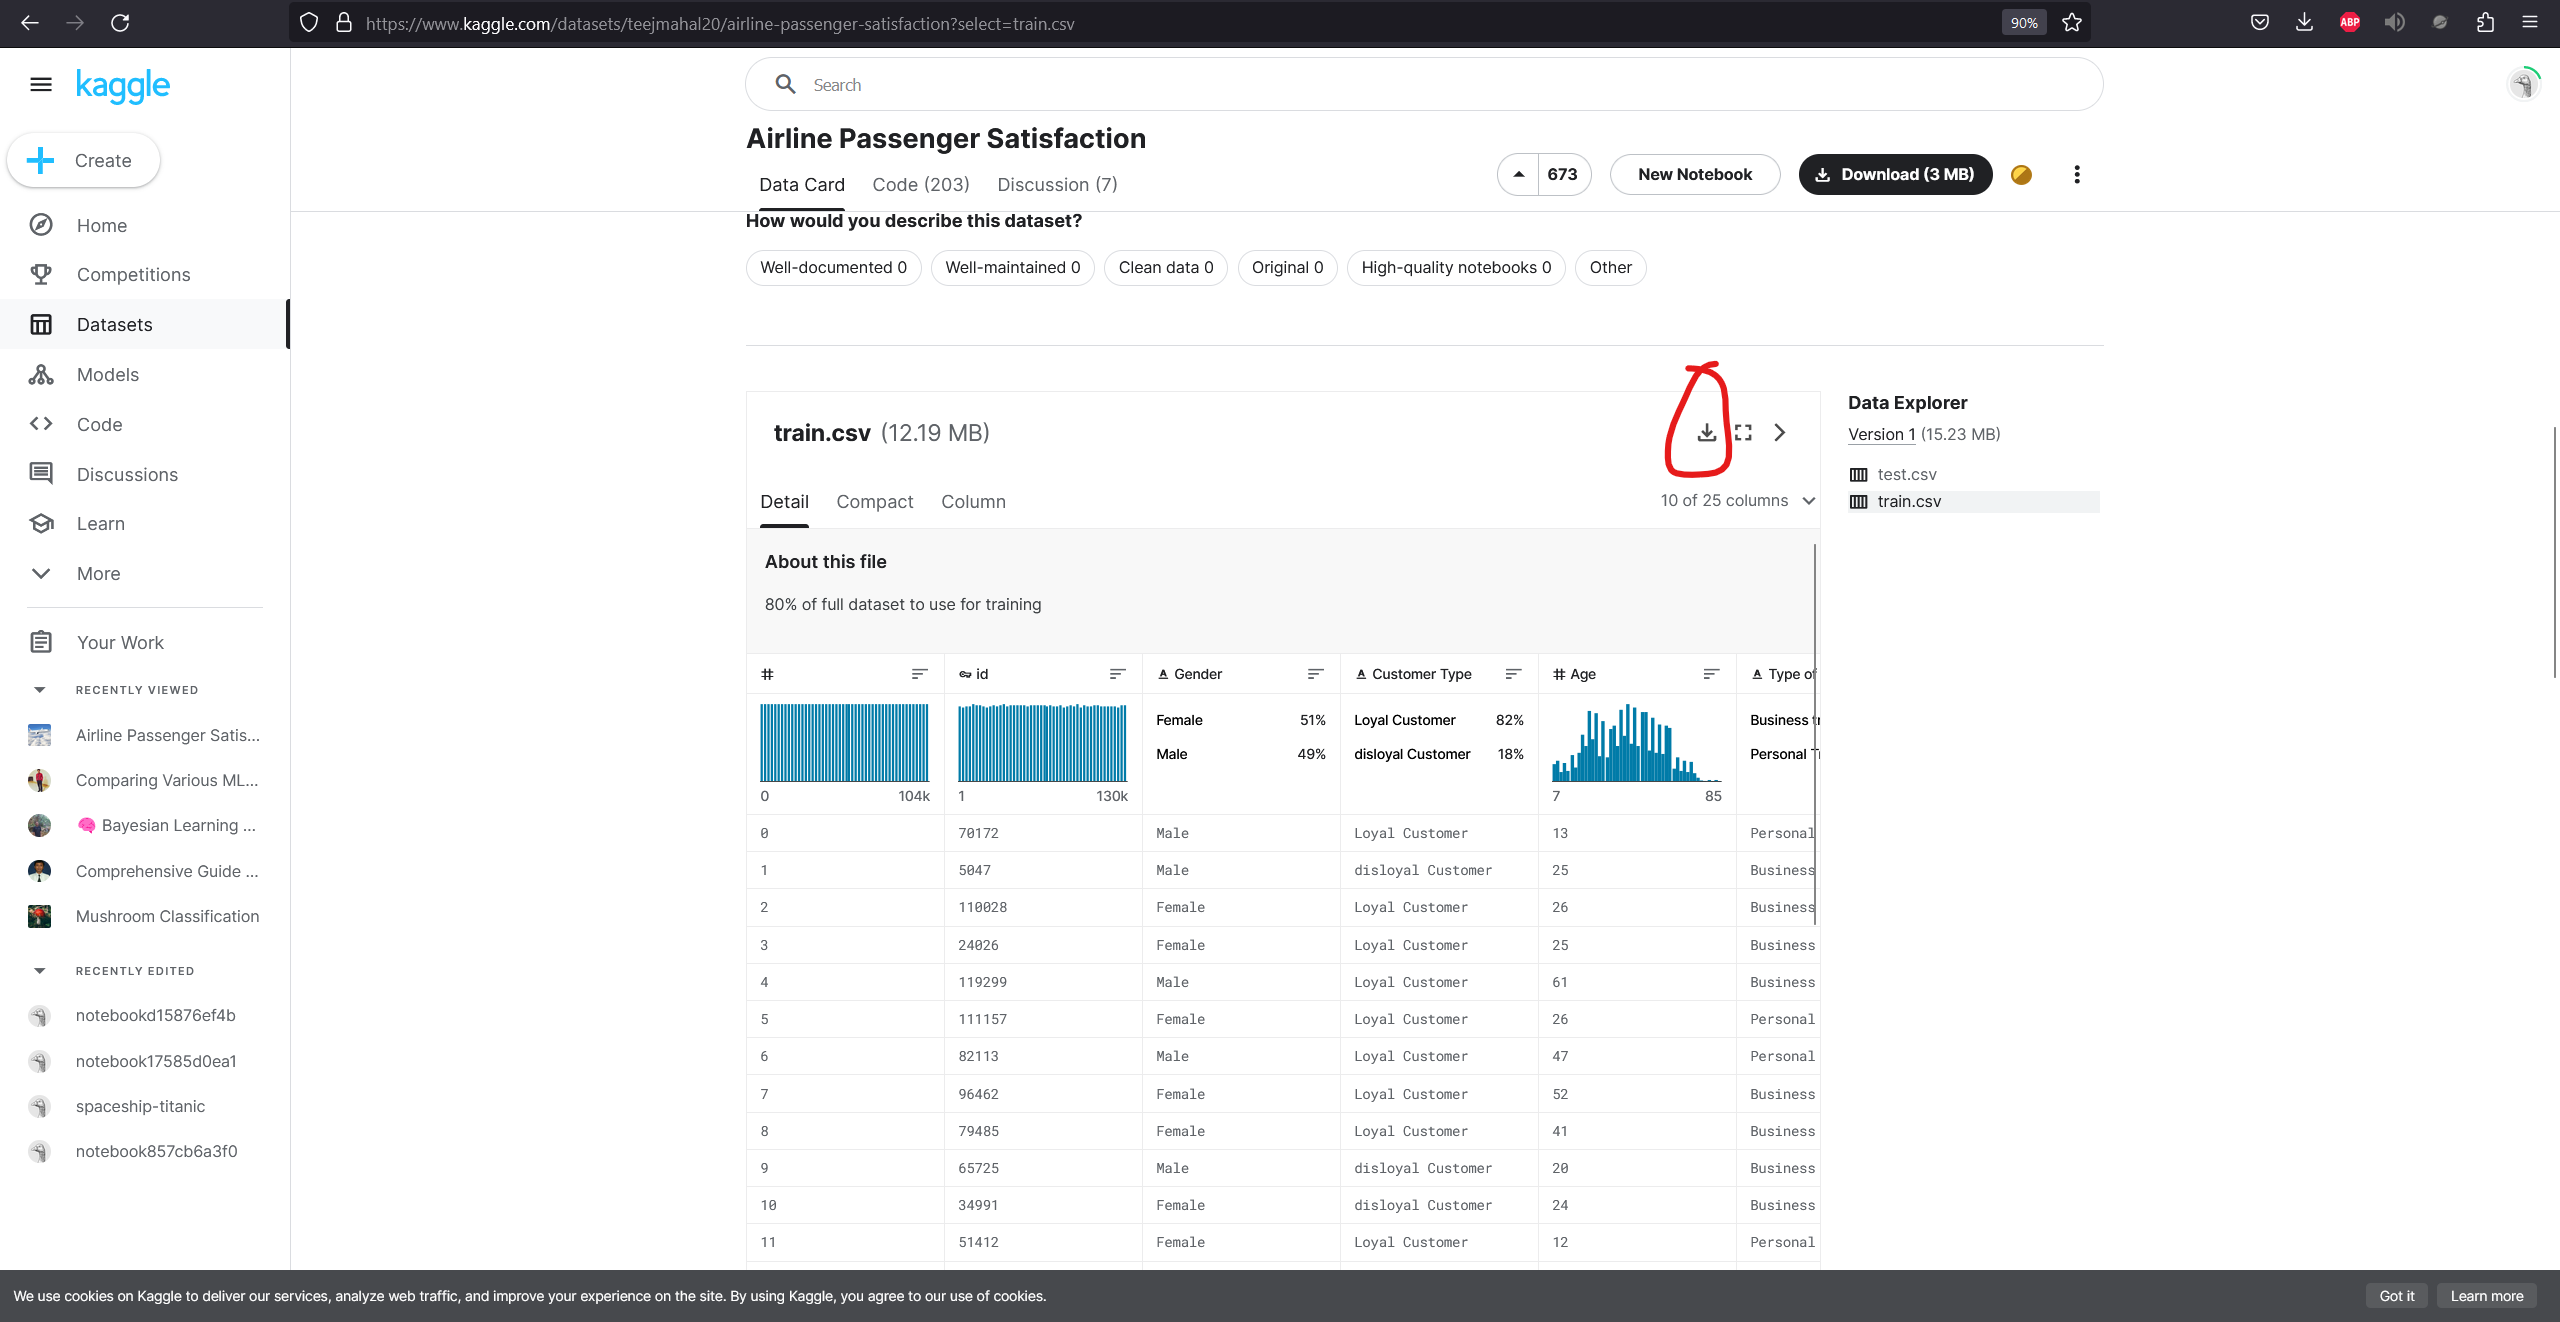

ещё там есть код, который писали другие люди, его тоже можно использовать, если он вам понадобится. посмотреть ноутбуки можно вроде бы только зарегистрированным пользователям, я не помню.
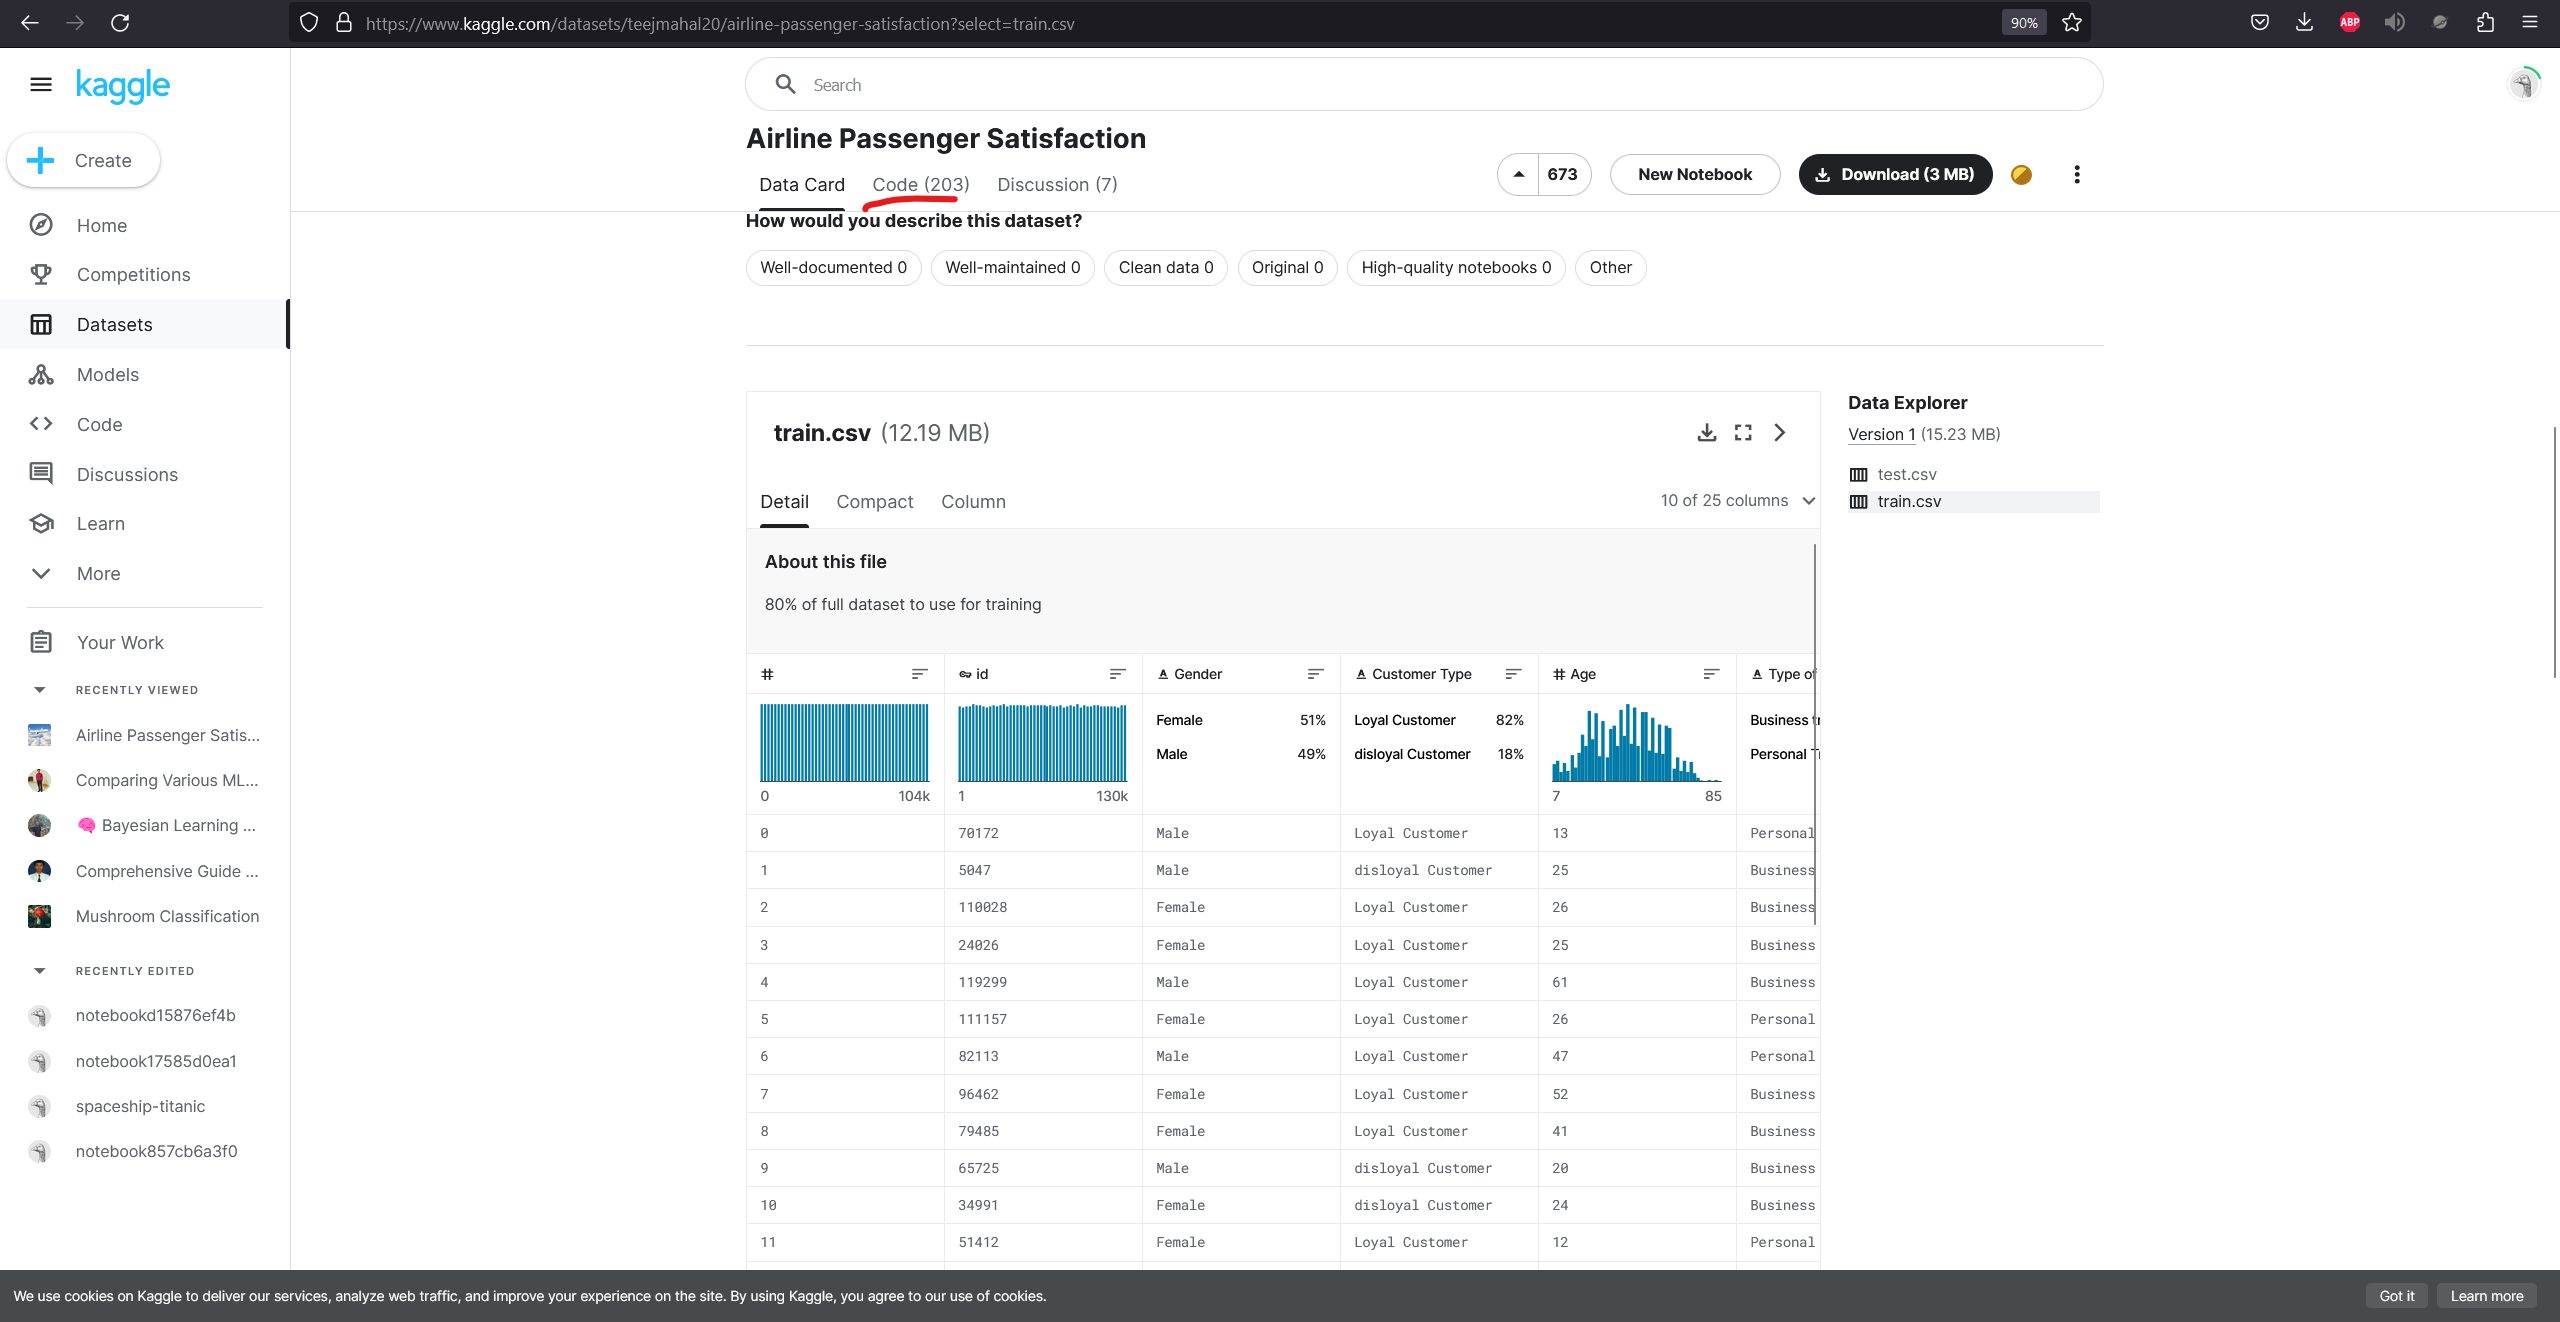

### Ниже представлено решение этой задачи.

нужно именно повторить так, как ниже, потому что чёлка доёбывается до всего.
Пример обучения модели для регрессии  есть в первом варианте задания, там есть обучение и метрики. Вот их просто использовать вместо тех, что в этом ноутбуке. Перебор гиперапараметров делать в принципе не так сложно - гуглите `sklearn Название_вашей_модели`, заходите на сайт с документацией и там будут описаны параметры для выбранного вами метода. Вот их и надо будет перебирать.

# Вариант 3. Построение модели и оптимизация гиперпараметров. Датасет https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Данный вариант предполагает фокусировку на процессе улучшения эффективности модели обучения с учителем. Студенту следует подготовить датасет к обучению, обучить одну из моделей с учителем со значениями гиперпараметров по умолчанию, получить значение эффективности. После этого вручную или автоматически подобрать значения гиперпараметров таким образом, чтобы получить максимальный прирост эффективности.

**Импортируем нужные библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Предобработка данных

**Считываем данные**

In [2]:
dataset = pd.read_csv('train3.csv', index_col='Unnamed: 0')
dataset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


эту картинку вставлять не надо, показываю откуда брать описание. Достаточно просто прогнать через переводчик
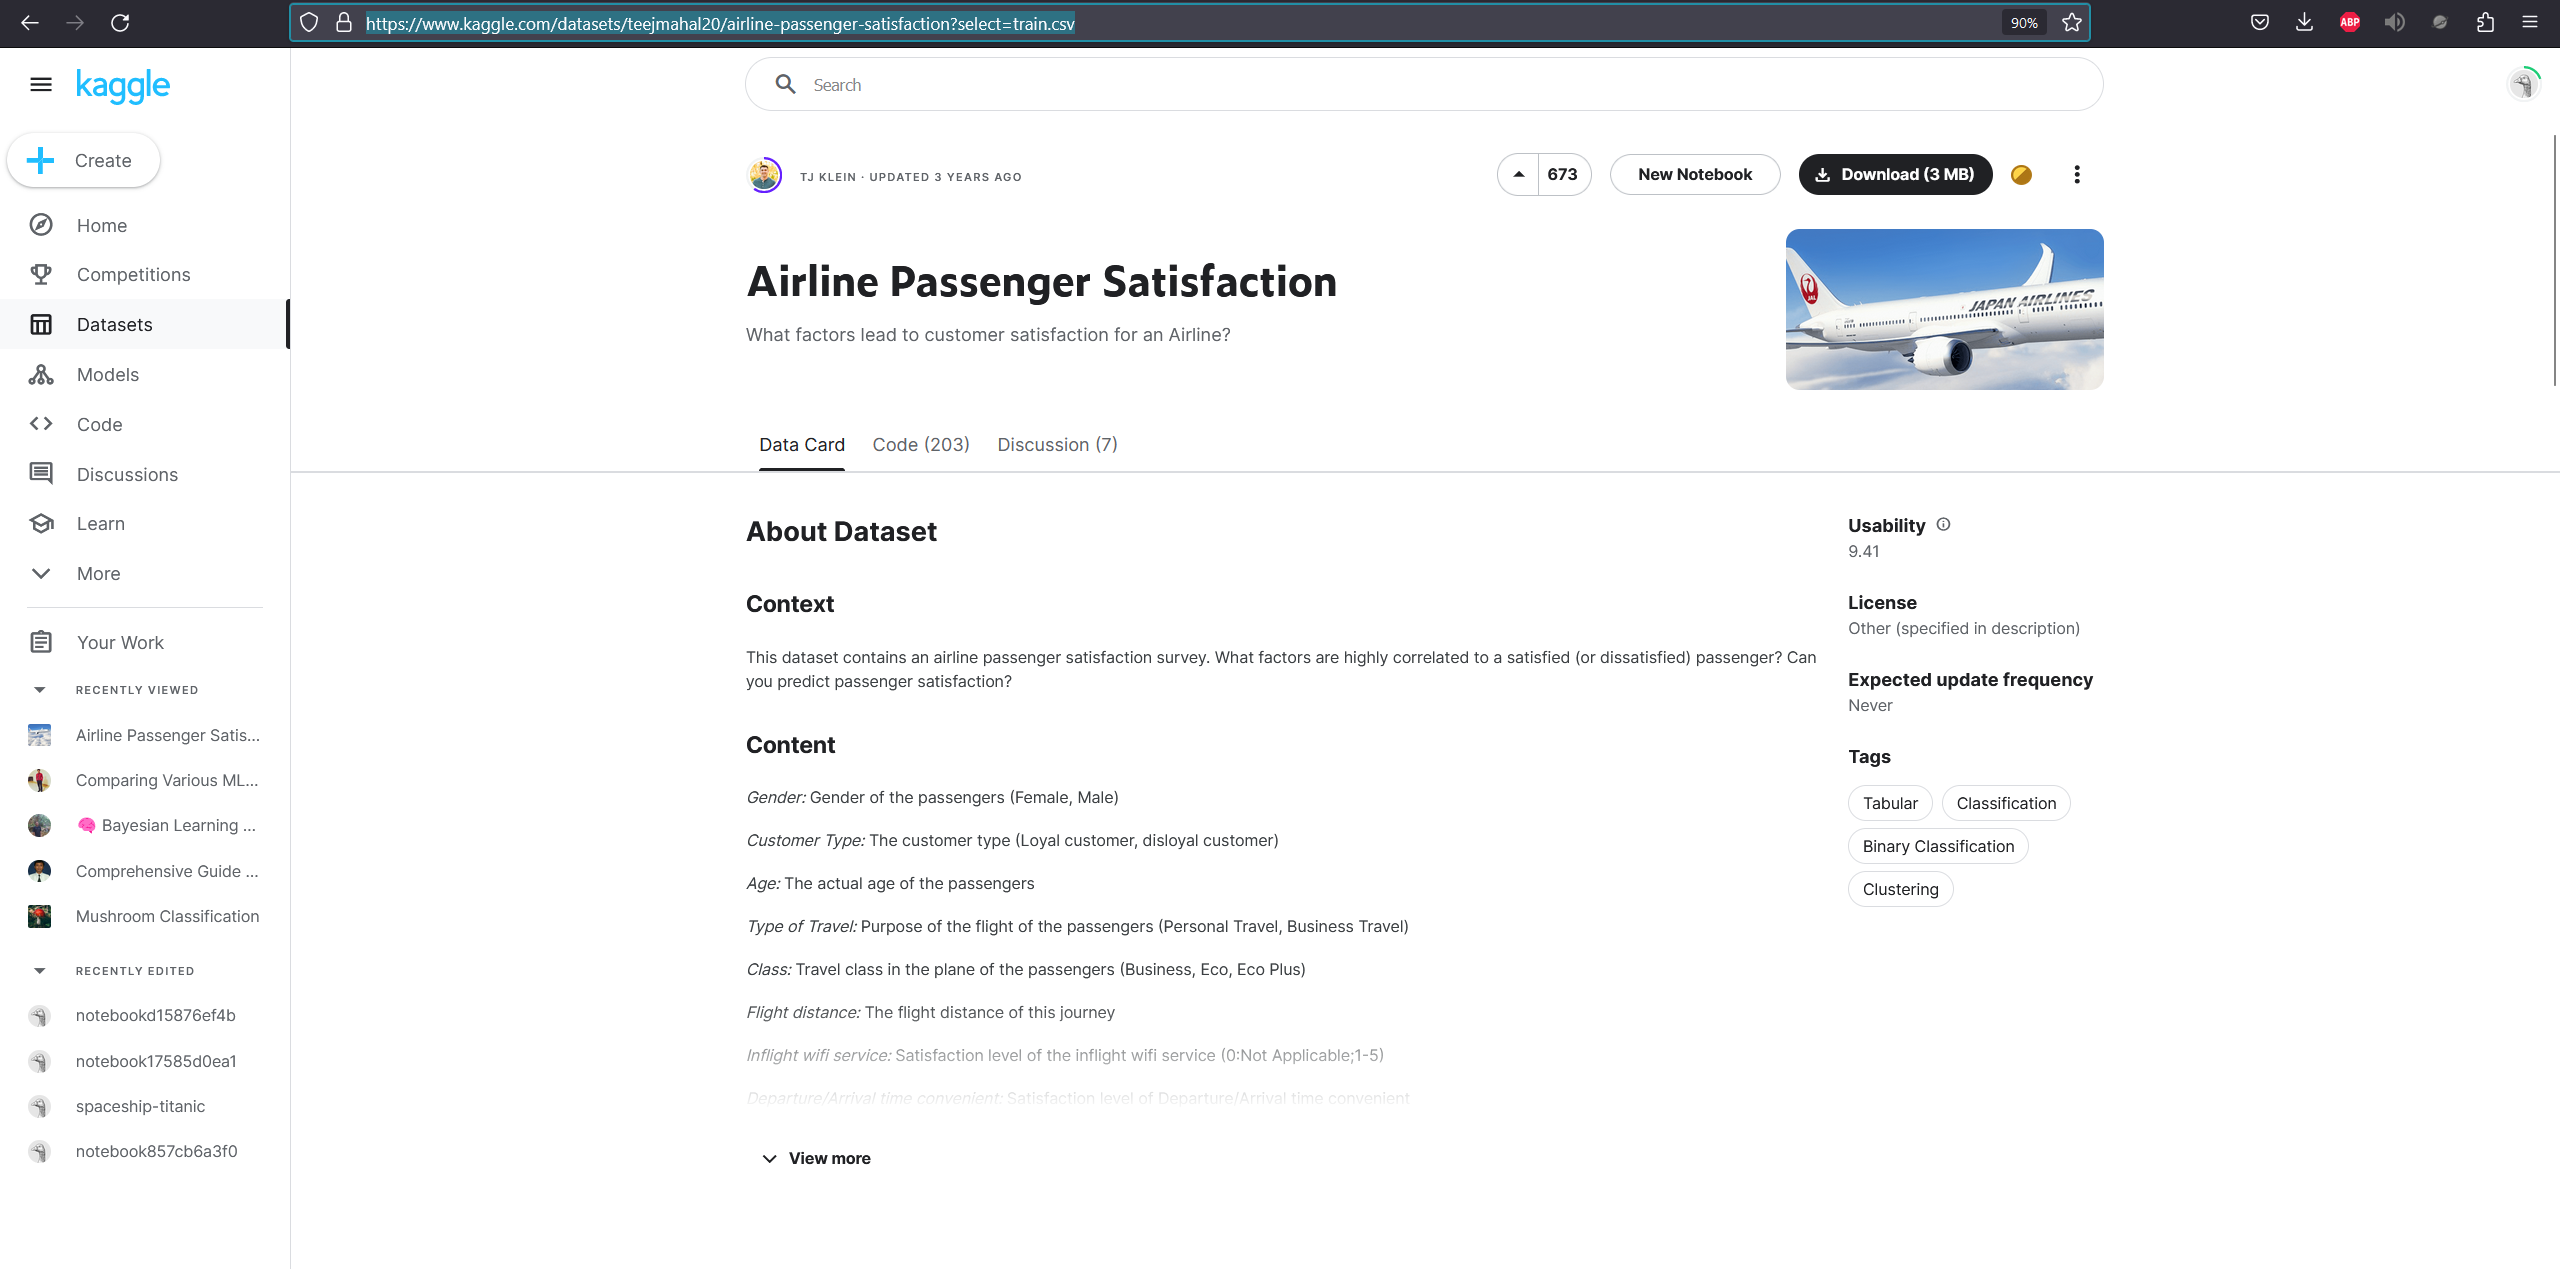

Описание датасета:

Этот набор данных содержит опрос об удовлетворенности пассажиров авиакомпании. Какие факторы в наибольшей степени влияют на удовлетворенность (или неудовлетворенность) пассажира? Можете ли вы предсказать удовлетворенность пассажиров?
Содержание

- Пол: Пол пассажиров (женщина, мужчина)

- Тип клиента: Тип клиента (лояльный клиент, нелояльный клиент)

- Возраст: Фактический возраст пассажиров

- Тип путешествия: Цель полета пассажиров (Личная поездка, деловая поездка)

- Класс: Пассажирский класс в самолете (Бизнес, Эко, Эко Плюс)

- Расстояние полета: Расстояние полета в этом путешествии

- Услуга Wi-Fi на борту: Уровень удовлетворенности услугой Wi-Fi на борту (0:Неприменимо;1-5)

- Удобное время отправления/прибытия: Уровень удовлетворенности удобным временем отправления/прибытия

- Простота онлайн-бронирования: Уровень удовлетворенности онлайн-бронированием

- Местоположение ворот: Уровень удовлетворенности местоположением ворот

- Еда и напитки: Уровень удовлетворенности едой и напитками

- Онлайн-посадка: уровень удовлетворенности онлайн-посадкой

- Комфорт сиденья: Удовлетворительный уровень комфорта сиденья

- Развлечения в полете: Уровень удовлетворенности развлечениями в полете

- Обслуживание на борту: Уровень удовлетворенности обслуживанием на борту

- Обслуживание в номерах для гостей: Уровень удовлетворенности обслуживанием в номерах для гостей

- Обработка багажа: Уровень удовлетворенности обработкой багажа

- Услуга регистрации заезда: Уровень удовлетворенности услугой регистрации заезда

- Обслуживание на борту: Уровень удовлетворенности обслуживанием на борту

- Чистота: Уровень удовлетворенности чистотой

- Задержка вылета в минутах: Задержка вылета на несколько минут

- Задержка прибытия в минутах: Задержка прибытия на несколько минут

- Удовлетворенность: Уровень удовлетворенности авиакомпании (удовлетворенность, нейтральный или неудовлетворенность неудовлетворенностью)

Сразу удалим id

In [3]:
dataset.drop(columns=['id'], inplace=True)

**Размер датасета**

In [4]:
dataset.shape

(103904, 23)

**Основная информация о датасете**

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

**Описательная статистика числовых признаков**

In [6]:
dataset.describe() 

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Статистика категориальных признаков**

In [7]:
dataset.describe(include=['O']) 

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


Если уникальных значений будет очень-очень много, например, какой-нибудь id и подобное, то можно смело потом удалить, но нужно об этом написать обязательно, вообще чем больше выводов и объяснений, тем лучше, так как училка-чёлка доёбывает за это. Команда для удаления колонки `dataset.drop(columns=['колонка1', 'колнка2' ..], inplace=True)`

**Матрица корреляций**

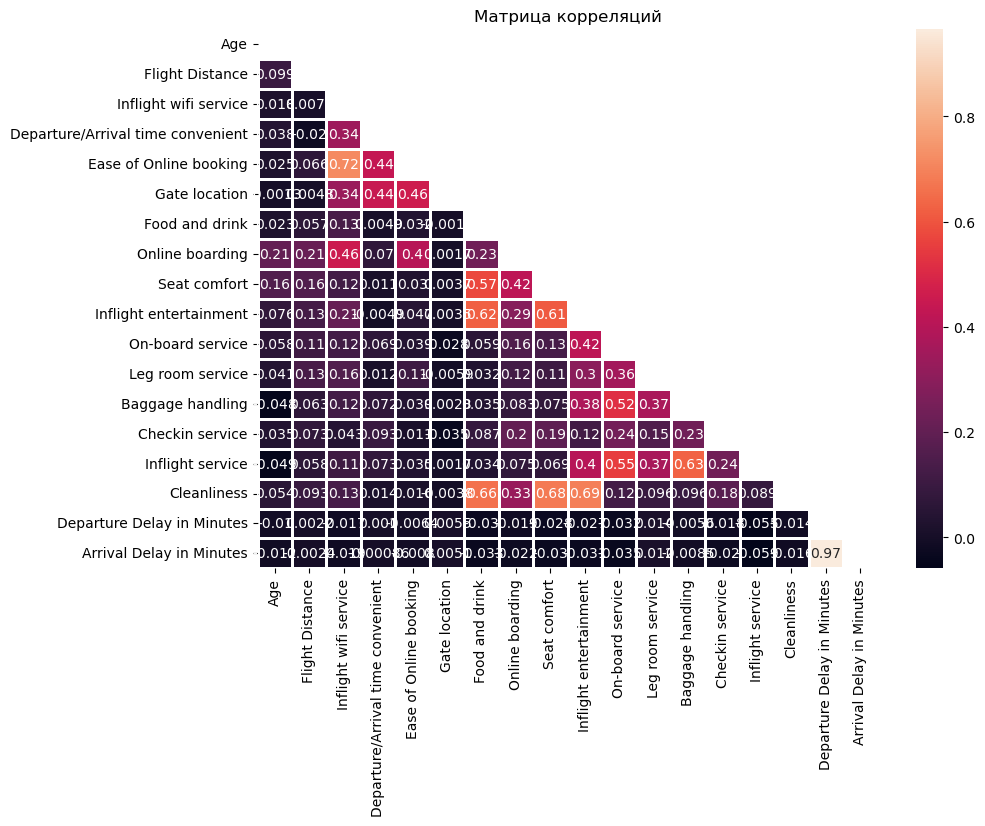

In [8]:
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,7))
plt.title('Матрица корреляций')
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=2);

**Проверка пропусков**

In [9]:
dataset.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Вывод - пропуски есть, их немного, можно дропнуть

В случае если пропуски будут:

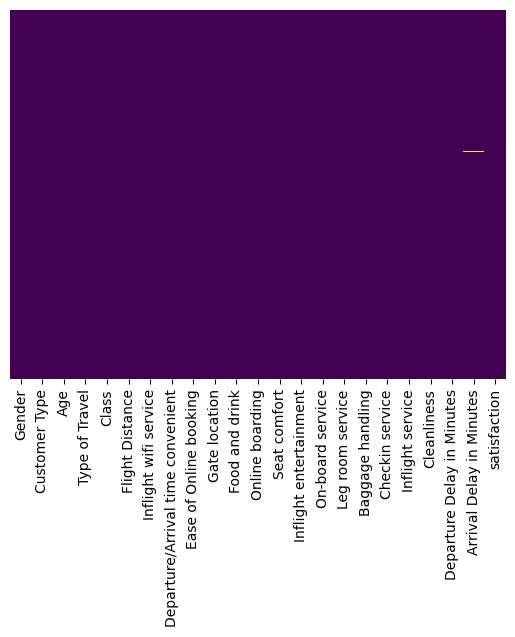

In [10]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis'); # визуализация 

- Если в одном столбце очень много пропусков - ну примерно процентов 40+, то столбик можно удалить делается командой `dataset.drop(columns=['колонка1', 'колонка2' ..], inplace=True)`
- Если пропусков в колонках в целом немного пропусков, можно сделать `dataset.dropna(inplace=True)`

Перед удалением подумайте

In [11]:
dataset.dropna(inplace=True)

**Подсчёт повторяющих строк в датасете**

In [12]:
len(dataset)-len(dataset.drop_duplicates())

0

Вывод - надо удалить повторяющиеся значения

In [13]:
dataset.drop_duplicates(inplace=True)

После этого можно сделать какую-нибудь визуализацию, я скину ноутбуки, там есть достаточно примеров, как визуализировать данные. Если успеете - возьмёте оттуда

**Переведение категориальных значений в числовые**

Здесь надо быть внимательными, т.к. среди колнок - ` class`, который мы будем предсказывать(целевая метка, таргет).
Иногда она уже бывает закодирована, а иногда нет, как в этом датасете

Видно, что она принимает два значения (unique=2), поэтому в принципе можно закодировать вместе со всеми, однако если будет unique>2, то для этого нужно использовать LabelEncoder следующим образом:

```
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['наша_колонка'] = le.fit_transform(df['наша_колонка'])
```

документация - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [14]:
dataset.describe(include=['O']) # какие ячейки у нас нечисловые

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [15]:
dataset.columns = dataset.columns
list_of_str_columns = dataset.describe(include=['O']).columns.tolist()
list_of_str_columns.remove('satisfaction')
list_of_str_columns  # тут чет пробел перед словом, так и было, такой датасет

['Gender', 'Customer Type', 'Type of Travel', 'Class']

**кодируем колонки**

In [16]:
# Проходимся по всем категориальным колонкам и добавляем в список уже закодированные
list_of_encoded_columns = []
for col in list_of_str_columns:
    list_of_encoded_columns.append(pd.get_dummies(dataset[col], drop_first=True))

In [17]:
# кодируем целевую метку
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['satisfaction'] = le.fit_transform(dataset['satisfaction'])

**присоединяем закодированные колонки**

In [18]:
# *list_of_encoded_columns - распаковываем значения из списка
dataset = pd.concat([dataset, *list_of_encoded_columns], axis=1)
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,25,18.0,0,1,0,1,0,1
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,4,1,1,6.0,0,1,1,0,0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,5,0,0.0,1,0,0,0,0,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,4,2,11,9.0,0,0,0,0,0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,0,0.0,1,1,0,0,0,0


**удаляем первоначальные колонки**

In [19]:
dataset.drop(list_of_str_columns, axis=1, inplace=True)
dataset.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,disloyal Customer,Personal Travel,Eco,Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,1,0,0,0,0


**убеждаемся, что нет нечисловых колонок**

In [20]:
dataset.info() # тут только int, uint и float, значит всё хорошо

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103594 non-null  int64  
 1   Flight Distance                    103594 non-null  int64  
 2   Inflight wifi service              103594 non-null  int64  
 3   Departure/Arrival time convenient  103594 non-null  int64  
 4   Ease of Online booking             103594 non-null  int64  
 5   Gate location                      103594 non-null  int64  
 6   Food and drink                     103594 non-null  int64  
 7   Online boarding                    103594 non-null  int64  
 8   Seat comfort                       103594 non-null  int64  
 9   Inflight entertainment             103594 non-null  int64  
 10  On-board service                   103594 non-null  int64  
 11  Leg room service                   1035

Теперь надо посмотреть на распределение нашей целевой метки

In [21]:
dataset['satisfaction'].value_counts()

0    58697
1    44897
Name: satisfaction, dtype: int64

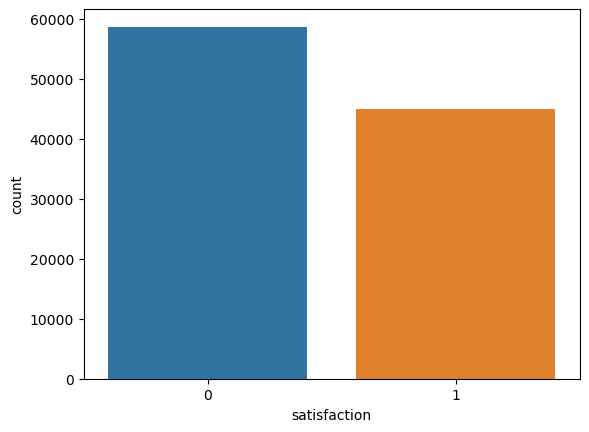

In [22]:
sns.countplot(x='satisfaction', data=dataset);

Видно, что классы сбалансированы. Если классы не будут сбалансированы, то используйте мой ноутбук, где есть код для балансировки

# Обучение модели

**Разделим датасет на признаки и целевую метрику**

In [23]:
X = dataset.drop(columns=['satisfaction'])
y = dataset['satisfaction']

**Отшкалируем наши признаки**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Разделим датасет на обучающую и тестирующую выборки**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Обучение моделей**

Обучим 4 модели и потом выберем 1, у которой будем подбирать гиперпараметры

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

Логистическая регрессия

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

Оценка логистической регрессии (за основу берём f1_score и матрицу ошибок, потому что классы не сбалансированы, иначе бы можно было оценивать по всем доступным метрикам)

In [28]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, y_pred))

Test accuracy_score 0.872
Test f1_score 0.872
Test recall_score 0.872
Test precision_score 0.872
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     17583
           1       0.87      0.83      0.85     13496

    accuracy                           0.87     31079
   macro avg       0.87      0.87      0.87     31079
weighted avg       0.87      0.87      0.87     31079



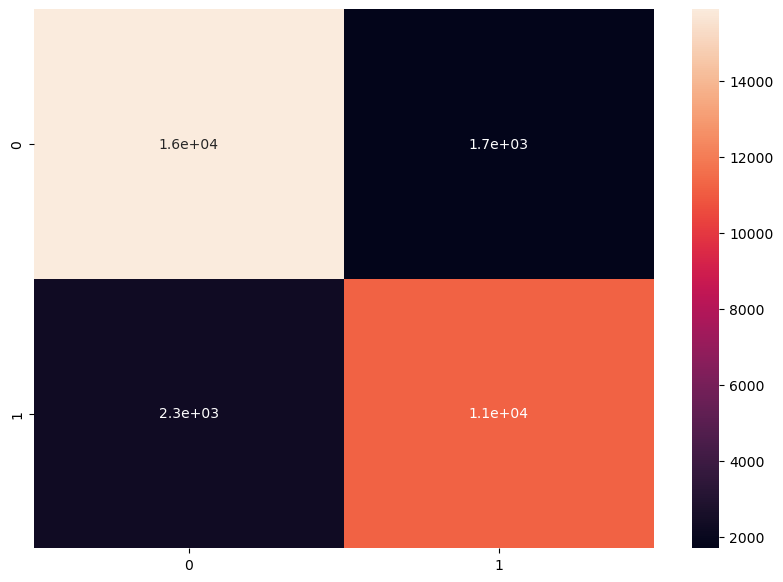

In [29]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим модель с помощью кросс-валидации

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=5, scoring='f1_weighted')
print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

f1_weighted - 0.875 со стандартным отклонением 0.002


Метод опорных векторов

In [31]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train) # может долго обучаться, это нормально
y_pred = svc.predict(X_test) 

Оценка метода опорных векторов

In [32]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, y_pred))

Test accuracy_score 0.952
Test f1_score 0.952
Test recall_score 0.952
Test precision_score 0.953
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17583
           1       0.96      0.93      0.94     13496

    accuracy                           0.95     31079
   macro avg       0.95      0.95      0.95     31079
weighted avg       0.95      0.95      0.95     31079



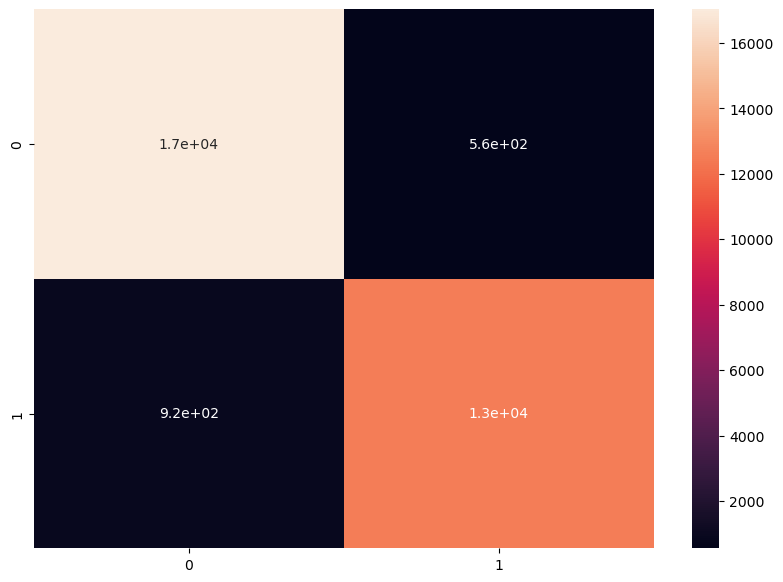

In [33]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим метод опорных векторов с помощью кросс-валидации

In [34]:
#scores = cross_val_score(SVC(kernel='rbf'), X, y, cv=5, scoring='f1_weighted') # может долго считать, это нормально
#print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

Дерево решений

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

Оценка дерева решений

In [36]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, y_pred))

Test accuracy_score 0.944
Test f1_score 0.944
Test recall_score 0.944
Test precision_score 0.944
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     17583
           1       0.93      0.94      0.94     13496

    accuracy                           0.94     31079
   macro avg       0.94      0.94      0.94     31079
weighted avg       0.94      0.94      0.94     31079



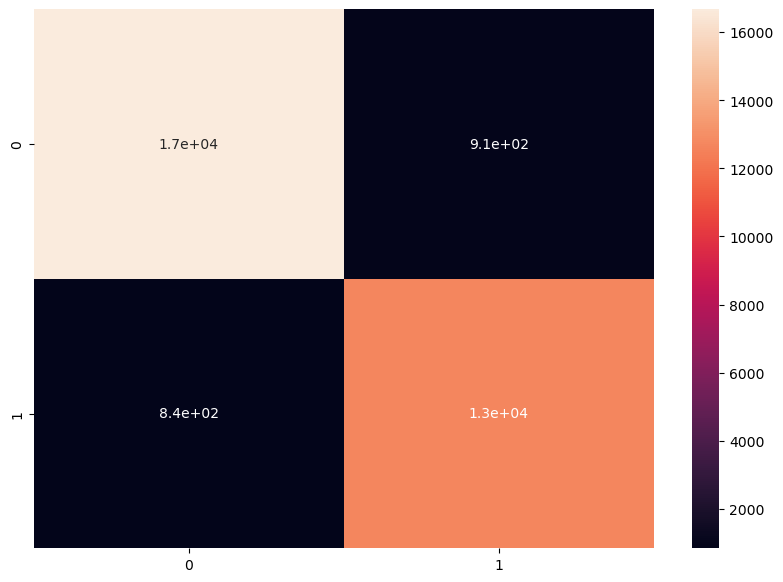

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим дерево решений с помощью кросс-валидации

In [38]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='f1_weighted')
print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

f1_weighted - 0.943 со стандартным отклонением 0.001


Случайный лес

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Оценка случайного леса

In [40]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, y_pred))

Test accuracy_score 0.960
Test f1_score 0.960
Test recall_score 0.960
Test precision_score 0.961
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     17583
           1       0.97      0.94      0.95     13496

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079



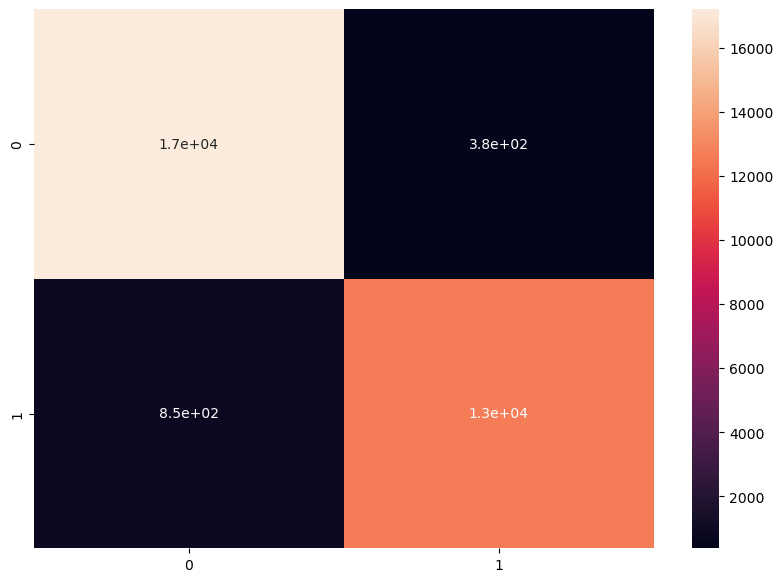

In [41]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Оценим случайный лес с помощью кросс-валидации

In [42]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='f1_weighted')
print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

f1_weighted - 0.961 со стандартным отклонением 0.002


Здесь надо будет написать вывод - напишите предложений 5, этого хватит. Надо проанализировать выбранные метрики, указать какие метрики у каких моделей лучше, какие хуже, проанализируйте матрицу ошибок у каждой из моделей. Напишите про крезультаты кросс-валидации

Теперь надо подобрать гиперпараметры. Вообще я сначала написал, что будем улучшать самую хорошую модель, но оказалось, что это метод опорных векторов. Это нехорошо для нас, потому что он долго обучается => долго будут подбираться гиперпараметры. 
Случайный лес тоже обучался немалое кол-во времени, поэтому в этом примере улучшим дерево решений.

Как подбирать:
- Заходим в документацию sklearn по дереву решений (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
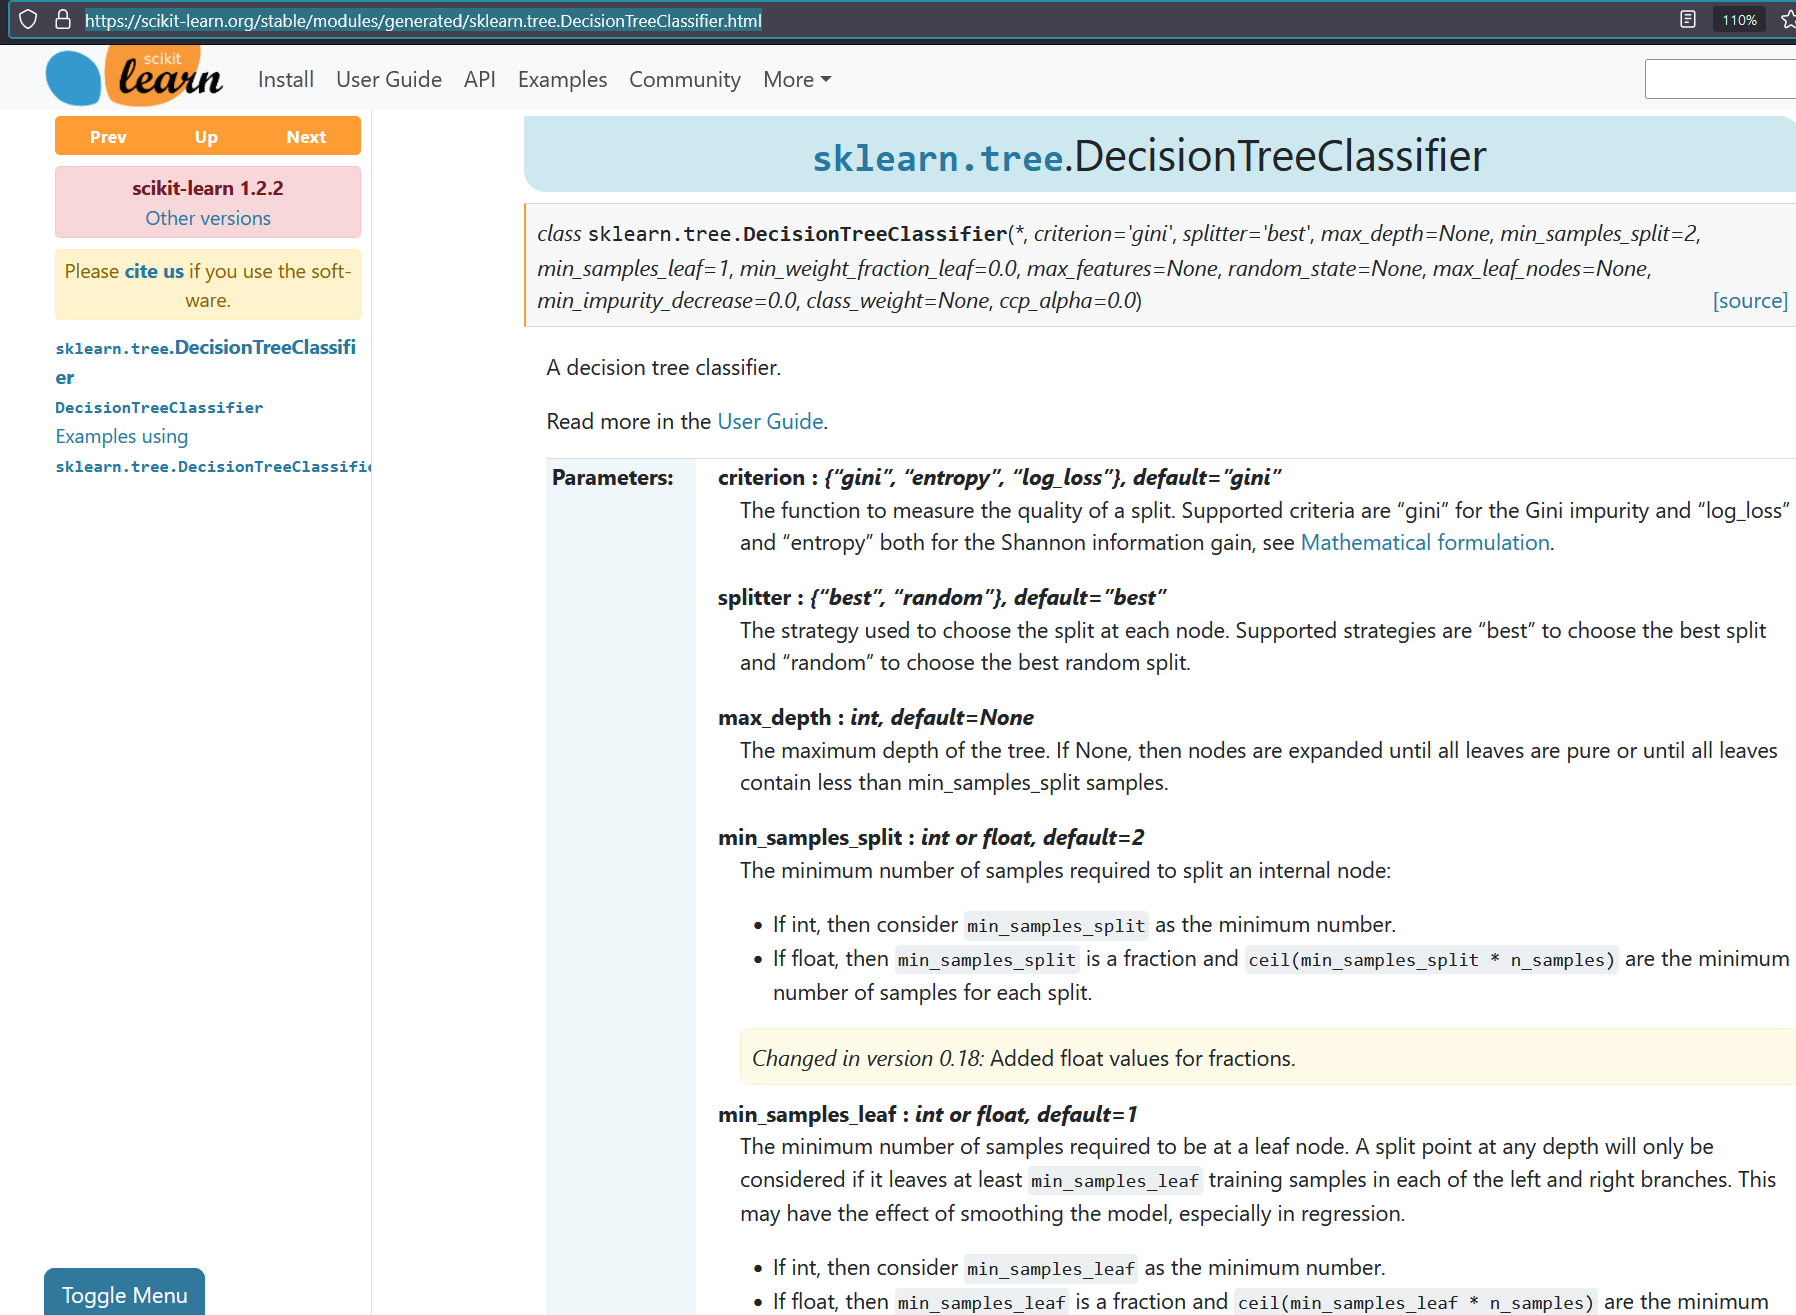 видим здесь `parameters` - вот их и надо подбирать. Выбираете сколько душе угодно, штук 5 думаю хватит, читаете какими они могут быть и на основе этого создаём словарь с параметрами. Помните, что слишком много значений у параметров перебираться будут долго, поэтому не перебощите, на каждый параметр по 5-6 значений, по ситуации

Подбор гиперпараметров с помощью GridSearchCV(поиск по сетке)

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [4, 6, 8, 10, 12],
    'min_samples_leaf': [2, 3, 4, 5],
}
dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtc,
                           param_grid=param_grid,
                           cv=4, # используем кросс-валидацию, 4 fold'а
                           n_jobs=-1, # используем весь процессор
                           verbose=3)

Поиск лучших параметров

In [44]:
dtc_grid_result = grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


Лучшие параметры

In [45]:
dtc_grid_result.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

Обучение модели с лучшими параметрами

In [46]:
best_model_dtc = DecisionTreeClassifier(**dtc_grid_result.best_params_)
best_model_dtc.fit(X_train, y_train)
y_pred = best_model_dtc.predict(X_test)

Оценка модели с лучшими параметрами

In [47]:
print(f"Test accuracy_score {accuracy_score(y_test, y_pred):.3f}")
print(f"Test f1_score {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test recall_score {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test precision_score {precision_score(y_test, y_pred, average='weighted'):.3f}")
print("=================================================")
print(classification_report(y_test, y_pred))

Test accuracy_score 0.950
Test f1_score 0.950
Test recall_score 0.950
Test precision_score 0.950
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17583
           1       0.95      0.93      0.94     13496

    accuracy                           0.95     31079
   macro avg       0.95      0.95      0.95     31079
weighted avg       0.95      0.95      0.95     31079



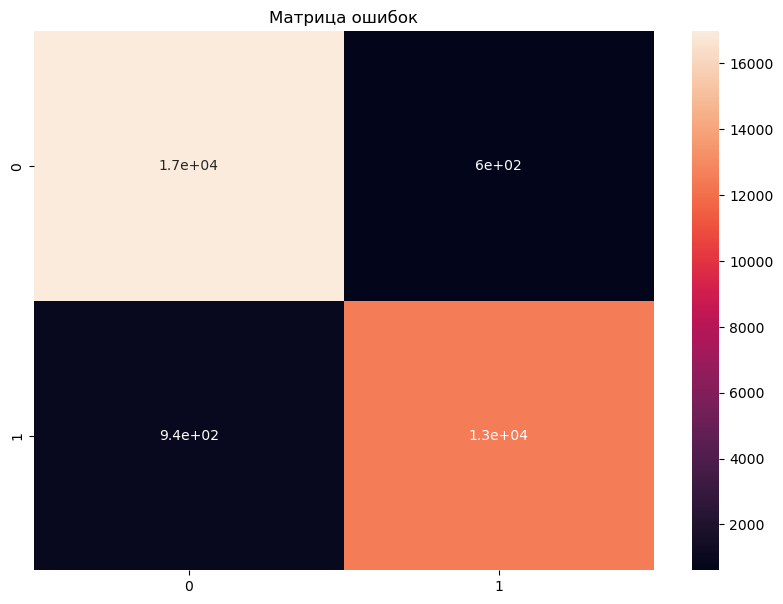

In [48]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Матрица ошибок");

Оценка лучших параметров кросс-валидацией

In [49]:
scores = cross_val_score(DecisionTreeClassifier(**dtc_grid_result.best_params_), X, y, cv=5, scoring='f1_weighted')
print(f"f1_weighted - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

f1_weighted - 0.949 со стандартным отклонением 0.002


Здесь сделаете выводы, что улучшилось и насколько. Проанализируйте выбранные метрики. Всё как всегда